# Choosing a location for a well

The oil production company needs to decide where to drill a new well.

We have oil samples in three regions: in each 10,000 fields, where we measured the quality of oil and the volume of its reserves. Build a machine learning model that will help determine the region where mining will bring the greatest profit. Analyze the possible profits and risks using the *Bootstrap.* technique.

Steps to select a location:

- Deposits are searched for in a selected region, and feature values are determined for each;
- Build a model and estimate the volume of reserves;
- The deposits with the highest estimated values are selected. The number of fields depends on the company’s budget and the cost of developing one well;
- Profit is equal to the total profit of the selected fields.

# Data Description

* id — unique well identifier;
* f0, f1, f2 — three signs of points (it doesn’t matter what they mean, but the signs themselves are significant);
* product — volume of reserves in the well (thousand barrels).

# Conditions of the problem:

1. Only linear regression is suitable for training the model (the rest are not predictable enough).
2. When exploring a region, 500 points are examined, from which, using machine learning, the best 200 are selected for development.
3. The budget for well development in the region is 10 billion rubles.
4. At current prices, one barrel of raw materials brings 450 rubles in income. The income from each unit of product is 450 thousand rubles, since the volume is indicated in thousands of barrels.
5. After assessing the risks, you need to leave only those regions in which the probability of losses is less than 2.5%. Among them, the region with the highest average profit is selected.

## Loading and preparing data

In [1]:
# download the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from scipy import stats as st

In [2]:
# download data for research
data_0 = pd.read_csv('C:/Users/hp/Documents/data_science/GitHub/Yandex_project/Датасеты/geo_data_0.csv')
data_1 = pd.read_csv('C:/Users/hp/Documents/data_science/GitHub/Yandex_project/Датасеты/geo_data_1.csv')
data_2 = pd.read_csv('C:/Users/hp/Documents/data_science/GitHub/Yandex_project/Датасеты/geo_data_2.csv')


In [3]:
# read the data data_0
display(data_0.head())
# let's study the data type and completeness of the table contents
data_0.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
# let's build a correlation matrix of variables for data_0
corr_0 = data_0.corr()
corr_0.style.background_gradient(cmap='RdYlGn')

C:\Users\hp\AppData\Local\Temp\ipykernel_12892\3761966417.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_0 = data_0.corr()


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


the highest correlation between f2 and product is 0.484, but at the same time this is a low level of correlation. There are weak positive and negative connections between traits.

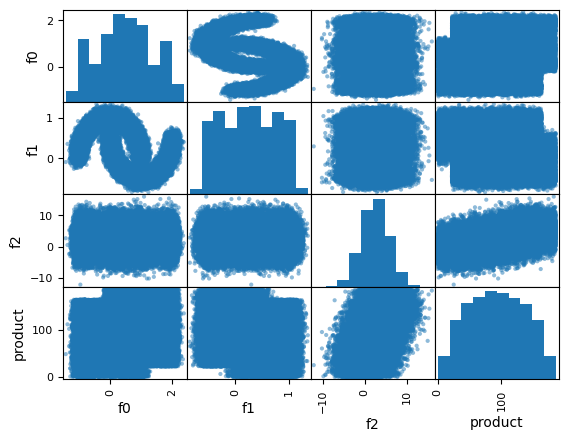

In [5]:
# let's build a scatterplot for data_0
scatter_matrix(data_0)
plt.show()

In [6]:
# display statistical data for data_0
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
# read the data data_1
display(data_1.head())
# дet's study the data type and completeness of the table contents
data_1.info()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
# let's build a correlation matrix of variables for data_1
corr_1 = data_1.corr()
corr_1.style.background_gradient(cmap='RdYlGn')

C:\Users\hp\AppData\Local\Temp\ipykernel_12892\3324993532.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_1 = data_1.corr()


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


very strong correlation between f2 and product 0.999. Perhaps in the future, when building a model, this connection will manifest itself. There are weak positive and negative connections between the signs.

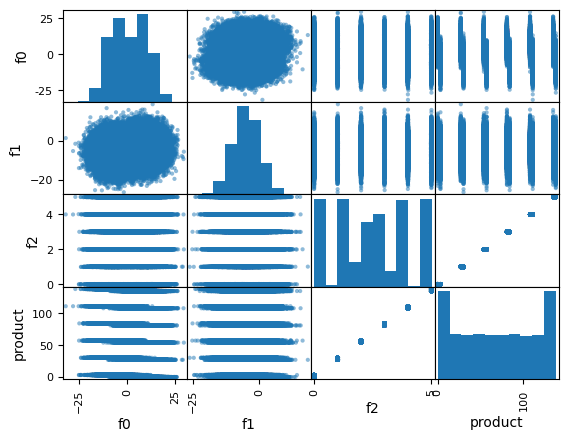

In [9]:
# let's build a scatterplot for data_1
scatter_matrix(data_1)
plt.show()

In [10]:
# display statistical data for data_1
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
# read the data data_2
display(data_0.head())
# let's study the data type and completeness of the table contents
data_2.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
# let's build a correlation matrix of variables for data_2
corr_2 = data_2.corr()
corr_2.style.background_gradient(cmap='RdYlGn')

C:\Users\hp\AppData\Local\Temp\ipykernel_12892\1515433248.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_2 = data_2.corr()


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


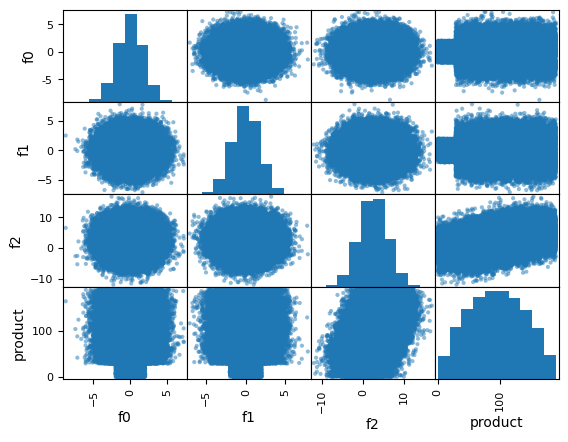

In [13]:
# let's build a scatterplot for data_2
scatter_matrix(data_2)
plt.show()

In [14]:
# display statistical data for data_2
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [15]:
# check for duplicate rows in each dataset
print(data_0.duplicated ().sum())
print(data_1.duplicated ().sum())
print(data_2.duplicated ().sum())

0
0
0


Conclusion: the data from the three datasets is 100% complete, without empty cells, and has no duplicate rows. We have prepared datasets for further work with them.

## Model training and validation

### Splitting tables into training and validation samples

In [16]:
# let's split the data into target features and features for all data
target_data_0 = data_0['product']
target_data_1 = data_1['product']
target_data_2 = data_2['product']
features_data_0 = data_0.drop(['product', 'id'], axis=1)
features_data_1 = data_1.drop(['product', 'id'], axis=1)
features_data_2 = data_2.drop(['product', 'id'], axis=1)


In [17]:
# let's split target and features into training and validation samples for all data
# data_0
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_data_0, target_data_0, 
                                                                                      test_size = 0.25, random_state=12345)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_data_1, target_data_1, 
                                                                                      test_size = 0.25, random_state=12345)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_data_2, target_data_2, 
                                                                                      test_size = 0.25, random_state=12345)


In [18]:
# let's check the separation
print('Size of samples with features:',features_train_0.shape, features_valid_0.shape)
print('Size of samples with target attribute:',target_train_0.shape, target_valid_0.shape)
print('Size of samples with features:',features_train_1.shape, features_valid_1.shape)
print('Size of samples with target attribute:',target_train_1.shape, target_valid_1.shape)
print('Size of samples with features:',features_train_2.shape, features_valid_2.shape)
print('Size of samples with target attribute:',target_train_2.shape, target_valid_2.shape)

Size of samples with features: (75000, 3) (25000, 3)
Size of samples with target attribute: (75000,) (25000,)
Size of samples with features: (75000, 3) (25000, 3)
Size of samples with target attribute: (75000,) (25000,)
Size of samples with features: (75000, 3) (25000, 3)
Size of samples with target attribute: (75000,) (25000,)


### Coding a model for data_0, data_1, data_2

In [19]:
# coding a LinearRegression model for data_0
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predicted_valid_0 = model_0.predict(features_valid_0)
rmse_0 = mean_squared_error(target_valid_0, predicted_valid_0) ** 0.5

For linear models, it is important that the features have a similar order. In our case, we were lucky; the signs do not differ much in the range of values.

In [20]:
print('Average inventory of predicted raw materials:', "%.2f" % predicted_valid_0.mean())
print('RMSE:', "%.2f" % rmse_0)

Average inventory of predicted raw materials: 92.59
RMSE: 37.58


In [21]:
# coding a LinearRegression for data_1
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predicted_valid_1 = model_1.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1, predicted_valid_1) ** 0.5

In [22]:
print('Average inventory of predicted raw materials:', "%.2f" % predicted_valid_1.mean())
print('RMSE:', "%.2f" % rmse_1)

Average inventory of predicted raw materials: 68.73
RMSE: 0.89


In [23]:
#  coding a LinearRegression for data_2
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predicted_valid_2 = model_2.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2, predicted_valid_2) ** 0.5

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

У метрики `MSE` есть встроенная возможность сразу считать rmse. Вот [здесь](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python) про это пишут

In [24]:
print('Average inventory of predicted raw materials:', "%.2f" % predicted_valid_2.mean())
print('RMSE:', "%.2f" % rmse_2)

Average inventory of predicted raw materials: 94.97
RMSE: 40.03


### Analysis of the results obtained

In [25]:
# display the results on the screen
# let's form the data into a table
table = pd.DataFrame(index = ['Average inventory of predicted raw materials', 'RMSE'],
                     columns = ['data_0', 'data_1', 'data_2'])
table['data_0'] = predicted_valid_0.mean(), rmse_0
table['data_1'] = predicted_valid_1.mean(), rmse_1
table['data_2'] = predicted_valid_2.mean(), rmse_2

display(table)

,data_0,data_1,data_2
Average inventory of predicted raw materials,92.592568,68.728547,94.965046
RMSE,37.579422,0.893099,40.029709


Regions 0 and 2 have a high average stock of predicted raw materials, while the root mean square errors in these regions also have a high value, which means that the model cannot accurately predict the size of the stock of raw materials in these regions. Region 1 has a low level of rmse (tends to zero), the average stock of predicted raw materials is 68.73. rmse tending to zero is a very good result; indicators 37 and 40 - low results of the model, taking into account that our target indicator data varies from 0 to 190 thousand barrels.

## Preparation for profit calculation

### Let's prepare key indicators

In [26]:
bu = 10000000 # budget for well development in the region, thousand rubles
inc_per_unit = 450 # income from each unit of product, thousand rubles.
product_mean_0 = data_0['product'].mean() # average stock of raw materials region with data_0
product_mean_1 = data_1['product'].mean() # average stock of raw materials region with data_1
product_mean_2 = data_2['product'].mean() # average stock of raw materials region with data_2
bu_1_point = bu/200 # budget for the development of 1 well, thousand rubles.
Count_Best = 200 # number of best wells
Count_Point = 500 # number of points used for reconnaissance


In [27]:
# let's look at raw material reserves, thousand barrels
print('Stock of raw materials for data_0:', product_mean_0)
print('Stock of raw materials for data_1:', product_mean_1)
print('Stock of raw materials for data_2:', product_mean_2)
print('Budget 1 well:', bu_1_point)

Stock of raw materials for data_0: 92.50000000000001
Stock of raw materials for data_1: 68.82500000000002
Stock of raw materials for data_2: 95.00000000000004
Budget 1 well: 50000.0


### Calculation of a sufficient volume of raw materials for break-even well development, thousand barrels

In [28]:
product_1_point = bu_1_point / inc_per_unit 
print('Sufficient volume of raw materials:', "%.2f" % product_1_point, 'thousand barrels')

Sufficient volume of raw materials: 111.11 thousand barrels


### Let's compare the sufficient volume with the average reserve of each region

In [29]:
# let's display the average predicted volume and average raw material reserves, thousand barrels
table_1 = pd.DataFrame(index = ['data_0', 'data_1', 'data_2'], columns = ['predicted_mean', 'product_mean'])
table_1['predicted_mean'] = predicted_valid_0.mean(), predicted_valid_1.mean(), predicted_valid_2.mean()
table_1['product_mean'] = product_mean_0, product_mean_1, product_mean_2
display(table_1)

,predicted_mean,product_mean
data_0,92.592568,92.500
data_1,68.728547,68.825
data_2,94.965046,95.000


The average level of predicted reserves and the average level of reserves are not sufficient in any region, since the sufficient volume of raw materials is 111 thousand barrels.

## Calculation of profits and risks

### Function for calculating the profit of the 200 best wells for each region

In [30]:
# select the 200 best predictions for data_0
predicted_valid_0

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

In [31]:
pred_sorted_0 = pd.Series(predicted_valid_0, index=target_valid_0.index).sort_values(ascending=False)
pred_200_0 = pred_sorted_0[:200]
display(pred_200_0)

93073    180.180713
46784    176.252213
78948    175.850623
43388    175.658429
6496     173.299686
            ...    
30488    148.507064
98799    148.481767
53840    148.476498
4638     148.436761
75908    148.365941
Length: 200, dtype: float64

In [32]:
# amount of predicted stock according to data_0
pred_200_0_sum = pred_200_0.sum()
print("%.2f" % pred_200_0_sum)

31102.33


In [33]:
# profit for predicted stock data_0
profit_pred_200_0 = pred_200_0_sum * inc_per_unit - bu
print("%.2f" % profit_pred_200_0)

3996048.88


In [34]:
# let's transfer all calculations to the function
def profit (predicted, count):
    pred_sorted = pd.Series(predicted).sort_values(ascending=False)
    pred_200 = pred_sorted[:count]
    pred_200_sum = pred_200.sum()
    profit_pred_200 = pred_200_sum * inc_per_unit - bu
    print('Amount of predicted reserves for 200 wells, thousand rubles.:', "%.2f" % pred_200_sum)
    print('Profit from predicted reserves of 200 wells, thousand barrels:', "%.2f" % profit_pred_200)

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Если здесь ты работаешь только с прогнозными значениями, то тогда для чего присваивать им индексы от реальных данных?

<div class="alert alert-info">
    
<span style = 'color: blue'> **Комментарий студента** </span>

<span style = 'color: blue'> Ты можешь, пожалуйста, мне написать пример, чтобы я до конца разобралась в этой теме? </span>

</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Здесь нам не важно, какие будут у предикта индексы, поэтому таргет можно убрать, т.е так

def profit(predicted, count):
    
    pred_200_sum = pd.Series(predicted).sort_values(ascending=False)[:count].sum()
    profit_pred_200 = pred_200_sum * inc_per_unit - bu
    
    print('Сумма предсказанного запаса 200 скважин, тыс. руб.:', "%.2f" % pred_200_sum)
    print('Прибыль предсказанного запаса 200 скважин, тыс. баррелей:', "%.2f" % profit_pred_200)

### Profit from 200 wells for data_0, data_1, data_2, thousand rubles.

In [35]:
# profit 200 wells data_0
print(profit (predicted_valid_0, Count_Best))

Amount of predicted reserves for 200 wells, thousand rubles.: 31102.33
Profit from predicted reserves of 200 wells, thousand barrels: 3996048.88
None


In [36]:
# profit 200 wells data_1
print(profit (predicted_valid_1, Count_Best))

Amount of predicted reserves for 200 wells, thousand rubles.: 27746.03
Profit from predicted reserves of 200 wells, thousand barrels: 2485712.05
None


In [37]:
# profit 200 wells data_2
print(profit (predicted_valid_2, Count_Best))

Amount of predicted reserves for 200 wells, thousand rubles.: 29603.90
Profit from predicted reserves of 200 wells, thousand barrels: 3321754.40
None


There are 200 wells in all three districts that will generate gross profit. The region with data_0 shows the highest profit. But at the same time, we also remember that the highest forecasting accuracy of the model is in the region with data_1.

### Bootstrap Profit and Risk Calculation

#### Function for calculating risks

In [38]:
def profit_2(predicted,target,count):
    probs_sorted = pd.Series(predicted).sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    revenue = selected.sum() * inc_per_unit
    return revenue - bu

In [39]:
def bootstrap_1000(target,predicted):
    values = []
    count=0
    state = np.random.RandomState(12345)
    predict_df = pd.Series(predicted, index=target.index)
    
    for i in range(1000):
        target_subsample = target.sample(n=Count_Point,replace=True, random_state=state)
  
        probs_subsample = predict_df[target_subsample.index]
        values.append(profit_2(probs_subsample,target_subsample, Count_Best))  
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    mean = values.mean()
    
       
    lower = values.quantile(0.025)
    hight = values.quantile(0.975)
    
    print('Average profit, thousand rubles.:', "%.2f" % mean)
    print('With a 95% probability, the profit in this region will be, thousand rubles. from:', "%.2f" % lower, 'to: ' "%.2f" % hight)
    print ('The percentage probability of loss in this region will be, %:', "%.2f" % (count/10))

#### Calculation of gains and risks for regions with data_0, data_1, data_2

In [40]:
# calculation of profits and risks for data_0
bootstrap_1000(target_valid_0,predicted_valid_0)

Average profit, thousand rubles.: 425938.53
With a 95% probability, the profit in this region will be, thousand rubles. from: -102090.09 to: 947976.35
The percentage probability of loss in this region will be, %: 6.00


In [41]:
# calculation of profits and risks for data_1
bootstrap_1000(target_valid_1,predicted_valid_1)

Average profit, thousand rubles.: 515222.77
With a 95% probability, the profit in this region will be, thousand rubles. from: 68873.23 to: 931547.59
The percentage probability of loss in this region will be, %: 1.00


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Я бы еще добавил отрисовку гистограмм распределений. На графики можно  еще вынести вертикальные динии для средних и доверительного интервала. Я бы использовал для этого [axvline](https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot)

In [42]:
# calculation of profits and risks for data_2
bootstrap_1000(target_valid_2,predicted_valid_2)

Average profit, thousand rubles.: 435008.36
With a 95% probability, the profit in this region will be, thousand rubles. from: -128880.55 to: 969706.95
The percentage probability of loss in this region will be, %: 6.40


Based on calculations, the most promising region is with data_1, since the profit with a 95% probability, we can assume that the profit from the 200 best wells (with the largest predicted reserve) will be from 69 thousand rubles. up to 931 thousand rubles, while regions with data_0 and data_2 give results from - 102 thousand rubles. and -128t.r. up to 931t.r. and 970 tr. respectively. At the same time, the probability of losses in the region with data_1 is 1%, in the other two regions it is 6% each.

## Conclusion

## At the first stage, we established that the data of the three datasets is 100% complete, without empty cells, and has no duplicate rows. 

At the second stage, the linear regression model was trained and tested on training and validation samples. For this reason, all three data sets were divided in a ratio of 75:25 into training and validation samples. The following values ​​were calculated: average regional reserve and RMSE. The following was revealed: regions 0 and 2 have a high average stock of predicted raw materials, while the root-mean-square errors in these regions also have a high value, which means that the model cannot accurately predict the size of the raw material stocks in these regions. Region 1 has a low level of rmse (tends to zero), the average stock of predicted raw materials is 68.73. rmse tending to zero is a very good result; indicators 37 and 40 - low results of the model, taking into account that our target indicator data varies from 0 to 190 thousand barrels.

At the third stage, we saved key indicators into variables and calculated the average sufficient supply of raw materials in the region to reach a break-even level. As a result of comparing the average indicators for the regions with the average sufficient, it was revealed that: the average level of predicted reserves and the average level of reserves are not sufficient in any region, since the sufficient volume of raw materials is 111 thousand barrels.

At the fourth stage, profit and risk calculations were carried out. To do this, wells with the largest average predicted reserves of raw materials were sorted in each region. When calculating profit, we received the following results: in all three regions there are 200 wells that will generate gross profit. The region with data_0 shows the highest profit. But at the same time, we also remember that the highest forecasting accuracy of the model is in the region with data_1.

We also calculated the average profit and risk of loss using the Bootstrap technique. Based on the results, the following conclusions were made: the most promising region is with data_1, since the profit with a 95% probability we can assume that the profit from the 200 best wells (with the largest predicted reserve) will be from 69 thousand rubles. up to 931 thousand rubles, while regions with data_0 and data_2 give results from - 102 thousand rubles. and -128t.r. up to 948 t.r. and 970 tr. respectively. At the same time, the probability of losses in the region with data_1 is 1%, in the other two regions it is 6% each.

